In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
df = pd.read_csv('../data/raw_postpro.csv', encoding='cp949')
df1 = df[['Machinery', 'Assembly' , "Part No.1","청구품목", 'key2', '리드타임']]
df1["leadtime"] = df["리드타임"].astype(int)


C:\Users\peos0\AppData\Local\Temp\ipykernel_1900\3345626481.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["leadtime"] = df["리드타임"].astype(int)


In [20]:
df1.info

<bound method DataFrame.info of                    Machinery                              Assembly   
0      NO.1 GENERATOR ENGINE               323-6480 LINES GP-FUEL   \
1      NO.2 GENERATOR ENGINE                            GASKET KIT   
2      NO.2 GENERATOR ENGINE             285-8374 MANIFOLD GP-EXH    
3      NO.1 GENERATOR ENGINE                     159-8828 TURBO GP   
4      NO.1 GENERATOR ENGINE             2N4727 INSTRUMNT PANEL GP   
...                      ...                                   ...   
20512            HYD. SYSTEM  5-753-2E_BOAT DAVIT & N.D CRANE LINE   
20513            HYD. SYSTEM  5-753-2E_BOAT DAVIT & N.D CRANE LINE   
20514            6M NET BOAT                       ELECTRIC CLUTCH   
20515            7M NET BOAT        HAND HYDRAULIC STEERING SYSTEM   
20516            7M NET BOAT        HAND HYDRAULIC STEERING SYSTEM   

                          Part No.1                                 청구품목   
0                         7.00E-275                

In [21]:
from sklearn.preprocessing import LabelEncoder

# 기존 데이터프레임의 라벨 인코딩 방식 확인
label_encoders = {}  # 각 열에 대한 LabelEncoder를 저장하기 위한 딕셔너리
columns_to_encode = ['Machinery', 'Assembly' , "Part No.1","청구품목", 'key2']  # 인코딩을 수행할 열의 이름 리스트

for column in columns_to_encode:
    le = LabelEncoder()
    le.fit(df1[column])
    label_encoders[column] = le
    df1[column+"_encoded"] = le.transform(df1[column])

C:\Users\peos0\AppData\Local\Temp\ipykernel_1900\2691750297.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column+"_encoded"] = le.transform(df1[column])
C:\Users\peos0\AppData\Local\Temp\ipykernel_1900\2691750297.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column+"_encoded"] = le.transform(df1[column])
C:\Users\peos0\AppData\Local\Temp\ipykernel_1900\2691750297.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [22]:
df1

,Machinery,Assembly,Part No.1,청구품목,key2,리드타임,leadtime,Machinery_encoded,Assembly_encoded,Part No.1_encoded,청구품목_encoded,key2_encoded
0,NO.1 GENERATOR ENGINE,323-6480 LINES GP-FUEL,7.00E-275,SEAL-O-RING-STOR,COOLER,194,194,108,281,5759,4848,18
1,NO.2 GENERATOR ENGINE,GASKET KIT,7.00E-275,OIL COOLER & LINES,COOLER,59,59,113,1180,5759,3692,18
2,NO.2 GENERATOR ENGINE,285-8374 MANIFOLD GP-EXH,7.00E-275,WASHER,COOLER,61,61,113,206,5759,5915,18
3,NO.1 GENERATOR ENGINE,159-8828 TURBO GP,7.00E-275,BOLT-HIGH TEMP,COOLER,212,212,108,69,5759,696,18
4,NO.1 GENERATOR ENGINE,2N4727 INSTRUMNT PANEL GP,7.00E-275,SEAL,COOLER,220,220,108,237,5759,4681,18
...,...,...,...,...,...,...,...,...,...,...,...,...
20512,HYD. SYSTEM,5-753-2E_BOAT DAVIT & N.D CRANE LINE,φ150 × φ85 × 695st,HYD. CYLINDER_NET BOAT DAVIT,CYLINDER,95,95,63,471,8126,2811,20
20513,HYD. SYSTEM,5-753-2E_BOAT DAVIT & N.D CRANE LINE,φ160 × φ112 × 1130st,HYD. CYLINDER_N.D CRANE_BOOM_LIFTER,CYLINDER,67,67,63,471,8127,2810,20
20514,6M NET BOAT,ELECTRIC CLUTCH,Φ305X5V-3,PULLY,BELT,25,25,0,900,8123,4151,5
20515,7M NET BOAT,HAND HYDRAULIC STEERING SYSTEM,Φ50 x S195 CYLINDER,CYLINDER,CYLINDER,25,25,4,1210,8124,1592,20


In [4]:
grouped_df = df1.groupby('key2')
grouped_df.head()
# grouped_df[['Subject','Machinery', 'Assembly', '청구품목']].head()
series = grouped_df['key2'].count()
series.iloc[:,]

key2
ADAPTER     167
ANODES       33
ARM          77
BATTERY      41
BEARING    1167
           ... 
UNIT        282
VALVE       999
WASHER      685
WINCH        33
WIRE        180
Name: key2, Length: 61, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df1[['Machinery_encoded', 'Assembly_encoded', "Part No.1_encoded", '청구품목_encoded']]
# X = df1[['Machinery', 'Assembly' , "Part No.1","청구품목"]]
# y = df1["key2_encoded"]
y = df1["leadtime"]
# X = np.array(X)
# y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, shuffle=True, test_size=0.3)
X_train.shape
# X_train, X_test

(14361, 4)

In [25]:
# y.unique().shape
X, y

(       Machinery_encoded  Assembly_encoded  Part No.1_encoded  청구품목_encoded
 0                    108               281               5759          4848
 1                    113              1180               5759          3692
 2                    113               206               5759          5915
 3                    108                69               5759           696
 4                    108               237               5759          4681
 ...                  ...               ...                ...           ...
 20512                 63               471               8126          2811
 20513                 63               471               8127          2810
 20514                  0               900               8123          4151
 20515                  4              1210               8124          1592
 20516                  4              1210               8125          4718
 
 [20517 rows x 4 columns],
 0        194
 1         59
 2         61
 3   

In [12]:
# X = np.array(X)
# y = np.array(y)
X.shape, y.shape

((20517, 4), (20517,))

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [26]:
from keras.models import Sequential
from keras.layers import Dense

# 회귀 모델 구축
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=4))  # 입력층 및 첫 번째 은닉층
model.add(Dense(64, activation='relu'))  # 두 번째 은닉층
model.add(Dense(1))  # 출력층 (1개의 출력 값)

In [27]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
1437/1437 [==============================] - 1s 804us/step - loss: 4857.8652
Epoch 2/10
1437/1437 [==============================] - 1s 814us/step - loss: 4817.6104
Epoch 3/10
1437/1437 [==============================] - 1s 775us/step - loss: 4813.0093
Epoch 4/10
1437/1437 [==============================] - 1s 684us/step - loss: 4807.7485
Epoch 5/10
1437/1437 [==============================] - 1s 696us/step - loss: 4803.0532
Epoch 6/10
1437/1437 [==============================] - 1s 741us/step - loss: 4781.1948
Epoch 7/10
1437/1437 [==============================] - 1s 815us/step - loss: 4752.9009
Epoch 8/10
1437/1437 [==============================] - 1s 826us/step - loss: 4752.3989
Epoch 9/10
1437/1437 [==============================] - 1s 793us/step - loss: 4743.2656
Epoch 10/10
1437/1437 [==============================] - 1s 815us/step - loss: 4713.6216


In [31]:
# 모델 평가
loss = model.evaluate(X_test, y_test)

193/193 [==============================] - 0s 672us/step - loss: 4670.3252


In [32]:
# 예측
predictions = model.predict(X_test)

193/193 [==============================] - 0s 631us/step


In [13]:
# 다중 분류 신경망 모델 구축
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))  # 입력층 및 첫 번째 은닉층
model.add(Dense(64, activation='relu'))  # 두 번째 은닉층
model.add(Dense(61, activation='softmax'))  # 출력층 (클래스의 개수인 61)
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=1)

Epoch 1/10
14361/14361 [==============================] - 11s 757us/step - loss: 14.3303 - accuracy: 0.1862
Epoch 2/10
14361/14361 [==============================] - 11s 753us/step - loss: 3.3337 - accuracy: 0.1950
Epoch 3/10
14361/14361 [==============================] - 11s 749us/step - loss: 3.3313 - accuracy: 0.1948
Epoch 4/10
14361/14361 [==============================] - 11s 752us/step - loss: 3.3309 - accuracy: 0.1948
Epoch 5/10
14361/14361 [==============================] - 11s 756us/step - loss: 3.3311 - accuracy: 0.1948
Epoch 6/10
14361/14361 [==============================] - 11s 779us/step - loss: 3.3310 - accuracy: 0.1948
Epoch 7/10
14361/14361 [==============================] - 11s 764us/step - loss: 3.3311 - accuracy: 0.1948
Epoch 8/10
14361/14361 [==============================] - 11s 785us/step - loss: 3.3310 - accuracy: 0.1948
Epoch 9/10
14361/14361 [==============================] - 11s 765us/step - loss: 3.3311 - accuracy: 0.1948
Epoch 10/10
14361/14361 [===========

In [ ]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)

In [ ]:
# 예측
predictions = model.predict(X_test)

In [9]:
model = Sequential()
model.add(Dense(61, activation='softmax', input_shape=(4,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 61)                305       
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'sgd', metrics = 'acc')
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
449/449 [==============================] - 0s 642us/step - loss: 81411.9609 - acc: 0.0827
Epoch 2/100
449/449 [==============================] - 0s 612us/step - loss: 80266.9453 - acc: 0.0834
Epoch 3/100
449/449 [==============================] - 0s 593us/step - loss: 80461.0781 - acc: 0.0799
Epoch 4/100
449/449 [==============================] - 0s 584us/step - loss: 82388.2266 - acc: 0.0788
Epoch 5/100
449/449 [==============================] - 0s 633us/step - loss: 79606.9375 - acc: 0.0843
Epoch 6/100
449/449 [==============================] - 0s 607us/step - loss: 80730.9609 - acc: 0.0806
Epoch 7/100
449/449 [==============================] - 0s 665us/step - loss: 80212.5781 - acc: 0.0840
Epoch 8/100
449/449 [==============================] - 0s 611us/step - loss: 80454.3984 - acc: 0.0792
Epoch 9/100
449/449 [==============================] - 0s 600us/step - loss: 78964.6562 - acc: 0.0811
Epoch 10/100
449/449 [==============================] - 0s 618us/step - loss: 7909

In [61]:
model.predict(X_test)

193/193 [==============================] - 0s 585us/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
model.evaluate(X_test, y_test)

193/193 [==============================] - 0s 666us/step - loss: 82674.5859 - acc: 0.0172


[82674.5859375, 0.017218973487615585]

In [75]:
from sklearn.datasets import load_iris
X1,y1 = load_iris(return_X_y=True) 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=40, shuffle=True, test_size=0.3, stratify = y1)

In [76]:
model = Sequential()
model.add(Dense(3, activation='softmax', input_shape=(4,)))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [99]:
X1, y1  

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [77]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'sgd', metrics = 'acc')
hist = model.fit(X1_train, y1_train, epochs=30)

Epoch 1/30
4/4 [==============================] - 0s 1ms/step - loss: 3.3358 - acc: 0.4190
Epoch 2/30
4/4 [==============================] - 0s 2ms/step - loss: 2.5310 - acc: 0.6667
Epoch 3/30
4/4 [==============================] - 0s 0s/step - loss: 2.0221 - acc: 0.6667
Epoch 4/30
4/4 [==============================] - 0s 0s/step - loss: 1.6004 - acc: 0.6667
Epoch 5/30
4/4 [==============================] - 0s 768us/step - loss: 1.1729 - acc: 0.6667
Epoch 6/30
4/4 [==============================] - 0s 0s/step - loss: 0.8596 - acc: 0.6667
Epoch 7/30
4/4 [==============================] - 0s 4ms/step - loss: 0.6470 - acc: 0.6667
Epoch 8/30
4/4 [==============================] - 0s 0s/step - loss: 0.5510 - acc: 0.8000
Epoch 9/30
4/4 [==============================] - 0s 0s/step - loss: 0.5323 - acc: 0.9048
Epoch 10/30
4/4 [==============================] - 0s 5ms/step - loss: 0.5244 - acc: 0.8952
Epoch 11/30
4/4 [==============================] - 0s 0s/step - loss: 0.5192 - acc: 0.8857
E

In [100]:
from tensorflow.keras.datasets.mnist import load_data
(X2_train, y2_train), (X2_test, y2_test) = load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [101]:
X2_train.shape, y2_train.shape

((60000, 28, 28), (60000,))

5

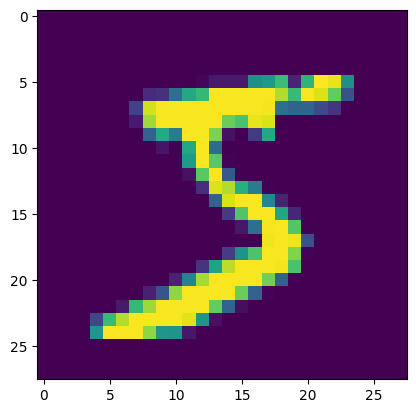

In [105]:
from PIL import Image
img = X2_train[0]

import matplotlib.pyplot as plt
img1 = Image.fromarray(img, mode='L')
plt.imshow(img1)

y2_train[0]

In [106]:
X2_train = X2_train.reshape(60000,-1)
X2_train.shape

(60000, 784)

In [107]:
X2_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [109]:
model2 = Sequential()
model2.add(Dense(10, activation='softmax', input_shape=(784,)))
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [110]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer = 'sgd', metrics = 'acc')
hist2 = model2.fit(X2_train, y2_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 2s 765us/step - loss: 312.2225 - acc: 0.8441
Epoch 2/30
1875/1875 [==============================] - 1s 712us/step - loss: 262.1629 - acc: 0.8678
Epoch 3/30
1875/1875 [==============================] - 1s 659us/step - loss: 246.1196 - acc: 0.8734
Epoch 4/30
1875/1875 [==============================] - 1s 777us/step - loss: 246.9188 - acc: 0.8765
Epoch 5/30
1875/1875 [==============================] - 1s 791us/step - loss: 244.8639 - acc: 0.8773
Epoch 6/30
1875/1875 [==============================] - 1s 786us/step - loss: 238.4901 - acc: 0.8801
Epoch 7/30
1875/1875 [==============================] - 1s 780us/step - loss: 236.9166 - acc: 0.8800
Epoch 8/30
1875/1875 [==============================] - 1s 770us/step - loss: 235.6544 - acc: 0.8814
Epoch 9/30
1875/1875 [==============================] - 1s 670us/step - loss: 234.3736 - acc: 0.8813
Epoch 10/30
1875/1875 [==============================] - 1s 671us/step - loss: 232.6180 - a

In [114]:
import numpy as np

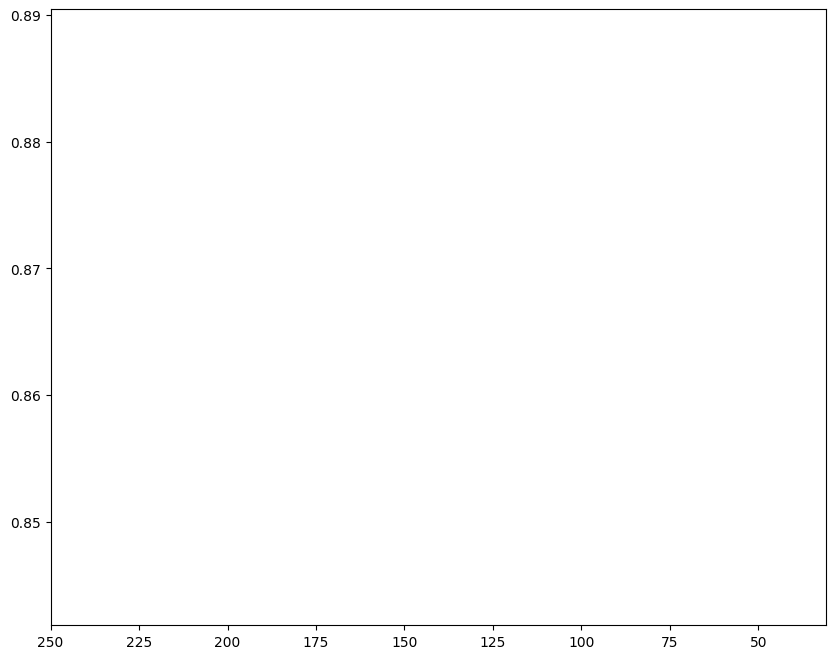

In [119]:
import numpy as np
acc = hist2.history['acc']
# val_acc = hist2.history['val_acc']
epo = np.arange(1, len(acc) +1)
plt.figure(figsize = (10, 8))
plt.xlim(250, len(acc)+1)
plt.plot(epo, acc, 'b', label='acc')
# plt.plot(epo, val_acc, 'g', label='val_acc')
plt.show()